In [1]:
import cantera as ct 
import numpy as np
import matplotlib.pyplot as plt

function for caclulating adiabatic temperature(T_ad), mole fraction (X) and mass fraction(Y)
SolveAdiabatic(oxid, fuel, phi, p, T)  
input  \
oxid - give the composition of oxygen e.x for air oxid = 'O2:1,N2:3.76' \
fuel - give the name of the fuel      e.x for Hydrogen fuel ='H2'\
phi- equivalence ratio                e.x for lean mixture phi=0.65\
P,T- Pressure( in atm) and Temperature(in K) e.x P=1.0, T=294.0\
output\
T_ad - Adiabatic temperature in K \
mole fractions of all species \

why use 'TP' instead of 'HP'? \
In many combustion scenarios, particularly for studying emissions, we assume that the process takes place at a known temperature and pressure. For example, in gas turbines or internal combustion engines, the operating pressure is often 1 atm (for ambient conditions), and the flame temperature can vary.




In [2]:

def SolveAdiabatic(oxid, fuel, phi, p, T):
    #gas=ct.Solution('my_nasa_gas.yaml','my_nasa_gas_full')
    species = {S.name: S for S in ct.Species.list_from_file("gri30.yaml")}
    gas = ct.Solution(thermo="IdealGas", species=species.values())  # Load the gas model
    gas.set_equivalence_ratio(phi, fuel, oxid)  # Set the equivalence ratio
    gas.TP = T, p  # Set the temperature and pressure
    species_names = gas.species_names
    ip = species_names.index(fuel)
    Y_fuel=gas.Y[ip]
    H_R=gas.enthalpy_mass
    gas.equilibrate('TP')  #
    H_P=gas.enthalpy_mass
    LHV=(H_R-H_P)/Y_fuel
    return  gas, LHV
     # Return the temperature and composition


Mixture intiazation  for $CH_4$\
Calling the functions different Temperatures\
A reasonable range for combustion studies could be from 1200 K to 2500 K, which covers typical combustion temperatures.


In [3]:

oxid = 'O2:1,N2:3.76'
fuel = 'CH4'

phi =1.0  # -, equivalence ratio of reactants
p = ct.one_atm    # atm, background pressure

T_array = np.arange(1200, 2500, 50)
LHV_1 = np.zeros(np.size(T_array))
Y_species_list_1 = []

for idx, T in enumerate(T_array):
     gas,LHV= SolveAdiabatic(oxid, fuel, phi, p, T)
     LHV_1[idx]=LHV/1e06 # in MJ/Kg
     Y_species_list_1.append(gas.Y) 

    

    



C:\Users\Ganesh\AppData\Local\Temp\ipykernel_20388\3514371017.py:4: DeprecationWarning: FactoryBase::canonicalize: Model name 'IdealGas' is deprecated. Use 'ideal-gas' instead.
  gas = ct.Solution(thermo="IdealGas", species=species.values())  # Load the gas model


Mixture intiazation  for $C_2H_4$

In [4]:
oxid = 'O2:1,N2:3.76'
fuel = 'C2H4'

phi =1.0  # -, equivalence ratio of reactants
p = ct.one_atm    # atm, background pressure
#T_ad_2 = np.zeros(np.size(T_array))
LHV_2 = np.zeros(np.size(T_array))
Y_species_list_2 = []

for idx, T in enumerate(T_array):
     gas2, LHV= SolveAdiabatic(oxid, fuel, phi, p, T)
     
     LHV_2[idx]=LHV/1e06
     Y_species_list_2.append(gas2.Y)
     gas2.Y

     

Mixture intiazation  for $C_3H_8$\

In [5]:
oxid = 'O2:1,N2:3.76'
fuel = 'C3H8'

phi =1.0  # -, equivalence ratio of reactants
p = ct.one_atm    # atm, background pressure
#T_ad_2 = np.zeros(np.size(T_array))
LHV_3 = np.zeros(np.size(T_array))
Y_species_list_3 = []

for idx, T in enumerate(T_array):
     gas3, LHV= SolveAdiabatic(oxid, fuel, phi, p, T)
     
     LHV_3[idx]=LHV/1e06
     Y_species_list_3.append(gas3.Y)
     

     

b)Plot for NO \
Temperature vs PPM (i.e X*1e+06)

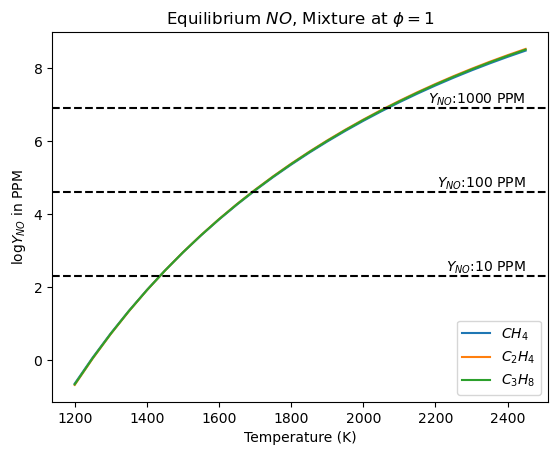

In [6]:
species_names = gas2.species_names
isp = species_names.index("NO") # Index for species 'NO'
plt.figure(2)

Y_NO_1 = []#in PPM
Y_NO_2= [] #in PPM
Y_NO_3= []

for idx, T in enumerate(T_array):
  #  X_species_1=X_species_list_1[idx]
    Y_NO_1.append(Y_species_list_1[idx][isp]*1E+06) #in PPM
    #X_species_2=X_species_list_2[idx]
    Y_NO_2.append(Y_species_list_2[idx][isp]*1E+06) #in PPM
    Y_NO_3.append(Y_species_list_3[idx][isp]*1E+06) #in PPM

# # Plot the data
plt.plot(T_array, np.log(Y_NO_1), label='$CH_4$')
plt.plot(T_array, np.log(Y_NO_2), label='$C_2H_4$')
plt.plot(T_array, np.log(Y_NO_3), label='$C_3H_8$')
# plt.plot(T_array, (Y_NO_1), label='$CH_4$')
# plt.plot(T_array, (Y_NO_2), label='$C_2H_4$')
# plt.plot(T_array, (Y_NO_3), label='$C_3H_8$')
plt.xlabel('Temperature (K)')
plt.ylabel(r'log$Y_{NO}$ in PPM')

# Draw horizontal lines for 100 ppm and 10 ppm in normal scale
ppm_1000 = 1000
ppm_100 = 100  # 100 PPM
ppm_10 = 10    # 10 PPM
plt.axhline(np.log(ppm_1000), color='black',linestyle='--',) 
plt.axhline(np.log(ppm_100), color='black',linestyle='--',)  # Line at 100 PPM (log scale)
plt.axhline(np.log(ppm_10), color='black',linestyle='--',) 
plt.text(T_array[-1], np.log(ppm_1000), '$Y_{{NO}}$:1000 PPM', color='black', va='bottom', ha='right')
plt.text(T_array[-1], np.log(ppm_100), '$Y_{{NO}}$:100 PPM', color='black', va='bottom', ha='right')
plt.text(T_array[-1], np.log(ppm_10), '$Y_{{NO}}$:10 PPM', color='black', va='bottom', ha='right')

plt.xticks()
plt.yticks()
plt.grid

plt.legend(loc='best') 
plt.title(r'Equilibrium $NO$, Mixture at $\phi=1$', fontsize=12)
plt.show()


Plot for $NO_x$ i.e $No+No_2$

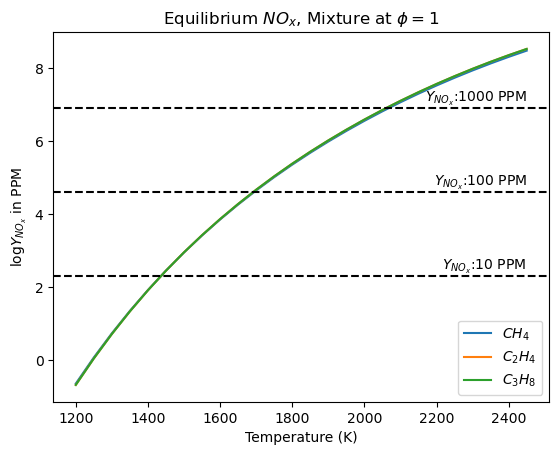

In [7]:
species_names = gas2.species_names
isp = species_names.index("NO") # Index for species 'NO'
isp2 = species_names.index("NO2")
plt.figure(2)

Y_NOx_1 = []#in PPM
Y_NOx_2= [] #in PPM
Y_NOx_3= []

for idx, T in enumerate(T_array):
  #  X_species_1=X_species_list_1[idx]
    Y_NOx_1.append((Y_species_list_1[idx][isp]*1E+06)+(Y_species_list_1[idx][isp2]*1E+06)) #in PPM
    #X_species_2=X_species_list_2[idx]
    Y_NOx_2.append((Y_species_list_2[idx][isp]*1E+06)+(Y_species_list_2[idx][isp2]*1E+06)) #in PPM
    Y_NOx_3.append((Y_species_list_2[idx][isp]*1E+06)+(Y_species_list_2[idx][isp2]*1E+06)) #in PPM

# # Plot the data
plt.plot(T_array, np.log(Y_NOx_1), label='$CH_4$')
plt.plot(T_array, np.log(Y_NOx_2), label='$C_2H_4$')
plt.plot(T_array, np.log(Y_NOx_3), label='$C_3H_8$')
# plt.plot(T_array, (Y_NO_1), label='$CH_4$')
# plt.plot(T_array, (Y_NO_2), label='$C_2H_4$')
# plt.plot(T_array, (Y_NO_3), label='$C_3H_8$')
plt.xlabel('Temperature (K)')
plt.ylabel(r'log$Y_{NO_{x}}$ in PPM')

# Draw horizontal lines for 100 ppm and 10 ppm in normal scale
ppm_1000 = 1000
ppm_100 = 100  # 100 PPM
ppm_10 = 10    # 10 PPM
plt.axhline(np.log(ppm_1000), color='black',linestyle='--',) 
plt.axhline(np.log(ppm_100), color='black',linestyle='--',)  # Line at 100 PPM (log scale)
plt.axhline(np.log(ppm_10), color='black',linestyle='--',) 
plt.text(T_array[-1], np.log(ppm_1000), '$Y_{{NO_x}}$:1000 PPM', color='black', va='bottom', ha='right')
plt.text(T_array[-1], np.log(ppm_100), '$Y_{{NO_x}}$:100 PPM', color='black', va='bottom', ha='right')
plt.text(T_array[-1], np.log(ppm_10), '$Y_{{NO_x}}$:10 PPM', color='black', va='bottom', ha='right')

plt.xticks()
plt.yticks()
plt.grid

plt.legend(loc='best') 
plt.title(r'Equilibrium $NO_x$, Mixture at $\phi=1$', fontsize=12)
plt.show()

Plot for CO \
Temperature vs PPM (i.e X*1e+06)

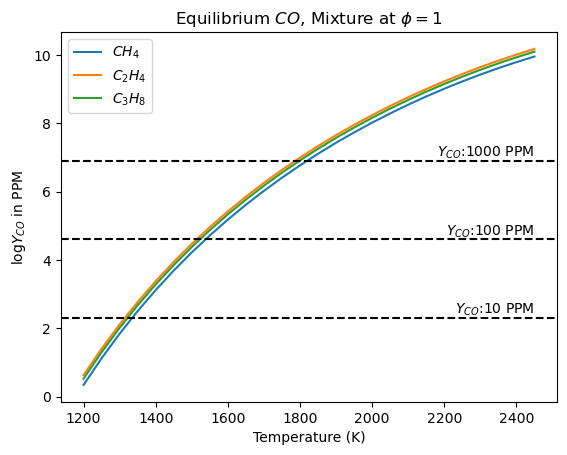

In [8]:
species_names = gas2.species_names
isp = species_names.index("CO") # Index for species 'NO'
plt.figure(2)

Y_CO_1 = []#in PPM
Y_CO_2= [] #in PPM
Y_CO_3= []

for idx, T in enumerate(T_array):
  #  X_species_1=X_species_list_1[idx]
    Y_CO_1.append(Y_species_list_1[idx][isp]*1E+06) #in PPM
    #X_species_2=X_species_list_2[idx]
    Y_CO_2.append(Y_species_list_2[idx][isp]*1E+06) #in PPM
    Y_CO_3.append(Y_species_list_3[idx][isp]*1E+06) #in PPM

# # Plot the data
plt.plot(T_array, np.log(Y_CO_1), label='$CH_4$')
plt.plot(T_array, np.log(Y_CO_2), label='$C_2H_4$')
plt.plot(T_array, np.log(Y_CO_3), label='$C_3H_8$')
# plt.plot(T_array, (Y_NO_1), label='$CH_4$')
# plt.plot(T_array, (Y_NO_2), label='$C_2H_4$')
# plt.plot(T_array, (Y_NO_3), label='$C_3H_8$')
plt.xlabel('Temperature (K)')
plt.ylabel(r'log$Y_{CO}$ in PPM')



    

# Draw horizontal lines for 100 ppm and 10 ppm in normal scale
ppm_1000 = 1000
ppm_100 = 100  # 100 PPM
ppm_10 = 10    # 10 PPM
plt.axhline(np.log(ppm_1000), color='black',linestyle='--',) 
plt.axhline(np.log(ppm_100), color='black',linestyle='--',)  # Line at 100 PPM (log scale)
plt.axhline(np.log(ppm_10), color='black',linestyle='--',) 
plt.text(T_array[-1], np.log(ppm_1000), '$Y_{{CO}}$:1000 PPM', color='black', va='bottom', ha='right')
plt.text(T_array[-1], np.log(ppm_100), '$Y_{{CO}}$:100 PPM', color='black', va='bottom', ha='right')
plt.text(T_array[-1], np.log(ppm_10), '$Y_{{CO}}$:10 PPM', color='black', va='bottom', ha='right')





plt.legend(loc='best') 
plt.title(r'Equilibrium $CO$, Mixture at $\phi=1$', fontsize=12)
plt.show()


Equilibrium HC

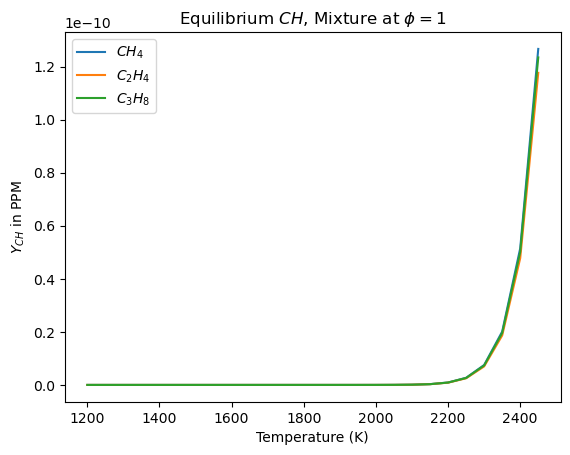

In [9]:
species_names = gas2.species_names
isp = species_names.index("CH") # Index for species 'NO'
plt.figure(2)

Y_CH_1 = [] 
Y_CH_2= []
Y_CH_3= []

for idx, T in enumerate(T_array):
  #  X_species_1=X_species_list_1[idx]
    Y_CH_1.append(Y_species_list_1[idx][isp]*1E+06) #in PPM
    #X_species_2=X_species_list_2[idx]
    Y_CH_2.append(Y_species_list_2[idx][isp]*1E+06) #in PPM
    Y_CH_3.append(Y_species_list_3[idx][isp]*1E+06) #in PPM

# # Plot the data
plt.plot(T_array, Y_CH_1, label='$CH_4$')
plt.plot(T_array, Y_CH_2, label='$C_2H_4$')
plt.plot(T_array, Y_CH_3, label='$C_3H_8$')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$Y_{CH}$ in PPM')

plt.legend(loc='best') 
plt.title(r'Equilibrium $CH$, Mixture at $\phi=1$', fontsize=12)
plt.show()

Equilibrium $CO_2$

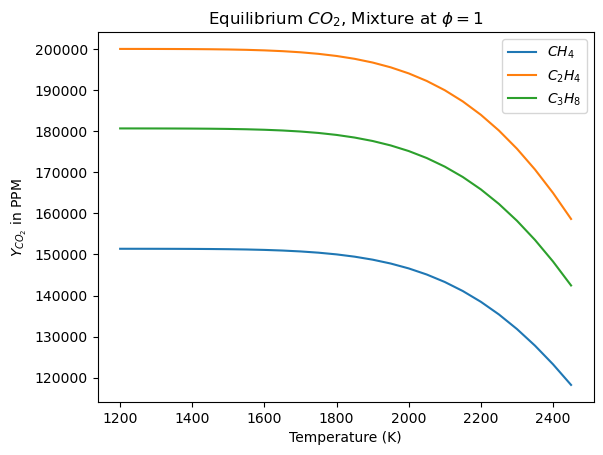

In [10]:
species_names = gas2.species_names
isp = species_names.index("CO2") # Index for species 'NO'
plt.figure(2)

Y_CO2_1 = [] 
Y_CO2_2= []
Y_CO2_3=[]

for idx, T in enumerate(T_array):
  #  X_species_1=X_species_list_1[idx]
    Y_CO2_1.append(Y_species_list_1[idx][isp]*1E+06) #in PPM
    #X_species_2=X_species_list_2[idx]
    Y_CO2_2.append(Y_species_list_2[idx][isp]*1E+06)
    Y_CO2_3.append(Y_species_list_3[idx][isp]*1E+06)

# # Plot the data
plt.plot(T_array, Y_CO2_1, label='$CH_4$')
plt.plot(T_array, Y_CO2_2, label='$C_2H_4$')
plt.plot(T_array, Y_CO2_3, label='$C_3H_8$')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$Y_{CO_2}$ in PPM')

plt.legend(loc='best') 
plt.title(r'Equilibrium $CO_2$, Mixture at $\phi=1$', fontsize=12)
plt.show()

$CO_2$ potential 

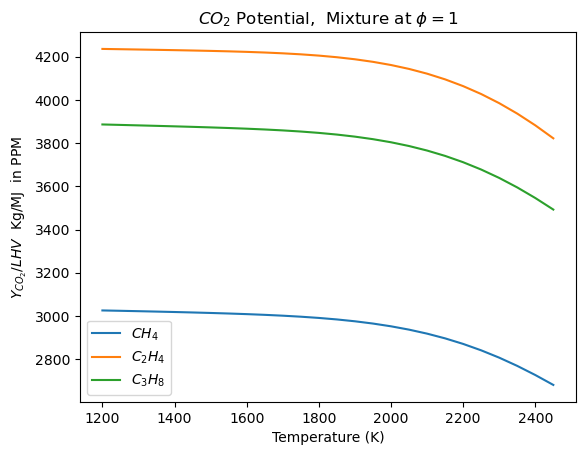

In [11]:
species_names = gas2.species_names
isp = species_names.index("CO2") # Index for species 'NO'
plt.figure(2)

Y_COp_1 = [] 
Y_COp_2= []
Y_COp_3=[]

for idx, T in enumerate(T_array):
  #  X_species_1=X_species_list_1[idx]
    Y_COp_1.append(Y_species_list_1[idx][isp]*1E+06/LHV_1[idx]) #in PPM
    #X_species_2=X_species_list_2[idx]
    Y_COp_2.append(Y_species_list_2[idx][isp]*1E+06/LHV_2[idx])
    Y_COp_3.append(Y_species_list_3[idx][isp]*1E+06/LHV_3[idx])

# # Plot the data
plt.plot(T_array, Y_COp_1, label='$CH_4$')
plt.plot(T_array, Y_COp_2, label='$C_2H_4$')
plt.plot(T_array, Y_COp_3, label='$C_3H_8$')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$Y_{CO_2}/LHV$  Kg/MJ  in PPM')

plt.legend(loc='best') 
plt.title(r'$CO_2$ Potential,  Mixture at $\phi=1$', fontsize=12)
plt.show()